# Helloworld for ML Part 2 ! 

In this section, we will start implementing some Machine Learning Algorithm to slove classification problem. 

In this case. predict the class (flower species) of the unlabled data.


Here is what we are going to cover in this step:

1. Separate out a validation dataset.
2. Set-up the test harness to use 10-fold cross validation.
3. Build 5 different models to predict species from flower measurements
4. Select the best model.

### Step 1: Seperate out a validation dataset
First, What is validation dataset? 

Validation dataset is a chunk of your dataset taken out to evaluate how well is your models perform. In this case, the accuracy of the prediction.   

We will split the loaded dataset into two, 80% of which we will use to train our models and 20% that we will hold back as a validation dataset.

In [1]:
# import the library
from pandas.tools.plotting import scatter_matrix
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder
import numpy as np
from sklearn.neighbors import KNeighborsClassifier

In [2]:
# load the dataset
dataset = pd.read_csv('iris.csv', sep=',')

In [3]:
# Split-out validation dataset
dataset.Species = pd.Categorical(dataset.Species)
dataset['SpeciesCode'] = dataset.Species.cat.codes
array = dataset.values
X = array[:,1:5]
Y = array[:,6]
le = LabelEncoder()
le.fit(Y)
Y = le.transform(Y)

validation_size = 0.20
seed = 7
X_train, X_validation, Y_train, Y_validation = model_selection.train_test_split(X, Y, test_size=validation_size, random_state=seed)

In [4]:
# Test options and evaluation metric
seed = 42
scoring = 'accuracy'

## Step 2: Build models
We don’t know which algorithms would be good on this problem or what configurations to use. We get an idea from the plots that some of the classes are partially linearly separable in some dimensions, so we are expecting generally good results.

Let’s evaluate 3 different algorithms:

1. Logistic Regression (LR)
2. Decision Tree (DT)
3. Artificial Neural Network (ANN)

Note that, there are many other classification algorithm as well such as Support Vector Machine, Random Forest, K-Nearest Neighbors, etc. 

In [5]:
# Spot Check Algorithms
models = []
models.append(('LR', LogisticRegression()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('SVM', SVC()))
models.append(('NN', MLPClassifier(hidden_layer_sizes=(13,13,13),max_iter=500,solver='lbfgs')))
# evaluate each model in turn
results = []
names = []
for name, model in models:
    # study whats kfold for here
    kfold = model_selection.KFold(n_splits=10, random_state=seed)
    cv_results = model_selection.cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.966667 (0.040825)
CART: 0.975000 (0.038188)
SVM: 0.991667 (0.025000)
NN: 0.925000 (0.087003)


## Step 3: Visualization

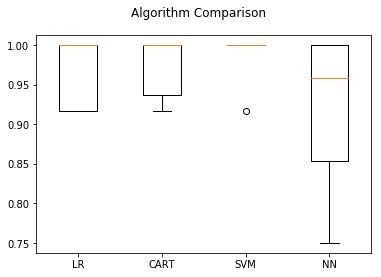

In [6]:
# Compare Algorithms
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

## Step 4: Make Predictions

In [7]:
# Make predictions on validation dataset
knn = KNeighborsClassifier()
knn.fit(X_train, Y_train)
predictions = knn.predict(X_validation)
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

0.9
[[ 7  0  0]
 [ 0 11  1]
 [ 0  2  9]]
             precision    recall  f1-score   support

          0       1.00      1.00      1.00         7
          1       0.85      0.92      0.88        12
          2       0.90      0.82      0.86        11

avg / total       0.90      0.90      0.90        30

